In [1]:
from res import *

In [2]:
df=pd.read_csv('../Data/labelledTweets.csv').fillna('')

print(len(df))

5302


In [3]:
import gensim

str_='w2v1_9_ESW5_C_swmod3_s_w2'
word2vec_path = str_+".bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Dell\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
from sklearn.model_selection import train_test_split
#df['embed'] = get_word2vec_embeddings(word2vec, df)
embed = get_word2vec_embeddings(word2vec, df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embed, df['labels'], 
                                                                                       test_size=0.3,random_state=20)

<Figure size 1152x1152 with 0 Axes>

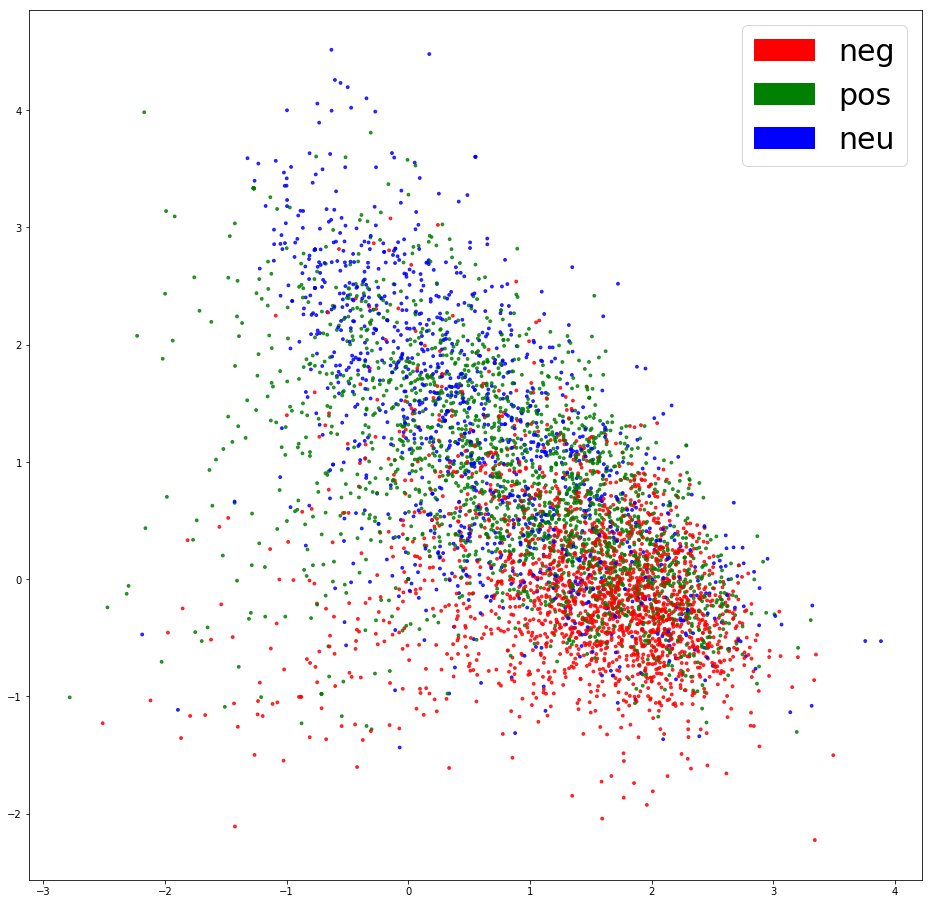

In [5]:
def str_to_no(arg):
    if arg['labels']=='pos':
        return 0
    if arg['labels']=='neu':
        return 1
    if arg['labels']=='neg':
        return 2

#for visulization
fig = plt.figure(figsize=(16, 16)) 

y=df.apply(str_to_no,axis=1)

#print(len(y),' ',len(embed))
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embed, y)
plt.show()

In [8]:
#Performing model selection to select suitable value of C

cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)

lst1=[0.000001,0.000003,0.00001,0.00003,0.0001,0.0003,0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
lst2=[ 0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
lst3=[ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

par_grid={'C': lst2, 'kernel': ['linear']}

learn_obj1=GridSearchCV(svm.SVC(), param_grid=par_grid, cv=cv,n_jobs=2)
learn_obj1.fit(X_train_word2vec, y_train_word2vec)


    
    
print('C vs mean_train_score')
for i,el in enumerate(lst2):
    print (el,' ',learn_obj1.cv_results_['mean_train_score'][i])


print('\nC vs mean_test_score')
for i,el in enumerate(lst2):
    print (el,' ',learn_obj1.cv_results_['mean_test_score'][i])


#among grids of lst1,lst2,lst3 we find that C=0.07 gives best result. So we use C=0.07 for training.

C vs mean_train_score
0.01   0.7603324348607369
0.02   0.7788409703504043
0.03   0.7904312668463612
0.04   0.7977088948787062
0.05   0.8033692722371967
0.06   0.8073674752920036
0.07   0.8119047619047619
0.08   0.8157681940700808
0.09   0.818418688230009

C vs mean_test_score
0.01   0.7330639730639731
0.02   0.7442424242424243
0.03   0.7458585858585859
0.04   0.7457912457912458
0.05   0.7463973063973064
0.06   0.7457239057239057
0.07   0.7464646464646465
0.08   0.7455218855218855
0.09   0.7449158249158249


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Train:
              precision    recall  f1-score   support

         neg       0.78      0.88      0.83      1478
         neu       0.81      0.69      0.74       777
         pos       0.82      0.78      0.80      1456

   micro avg       0.80      0.80      0.80      3711
   macro avg       0.80      0.78      0.79      3711
weighted avg       0.80      0.80      0.80      3711

accuracy: 0.8016707087038534


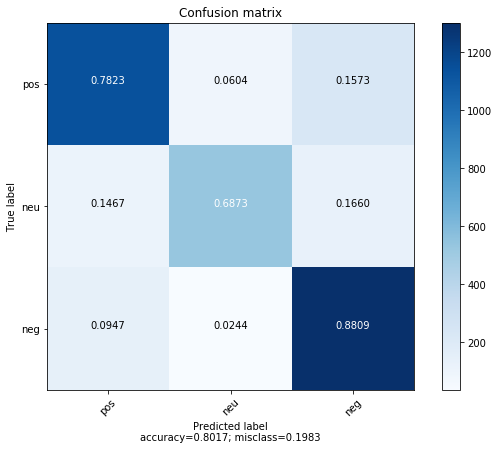


Test:
              precision    recall  f1-score   support

         neg       0.74      0.82      0.78       634
         neu       0.77      0.65      0.70       333
         pos       0.77      0.75      0.76       624

   micro avg       0.76      0.76      0.76      1591
   macro avg       0.76      0.74      0.75      1591
weighted avg       0.76      0.76      0.76      1591

accuracy: 0.7573852922690132


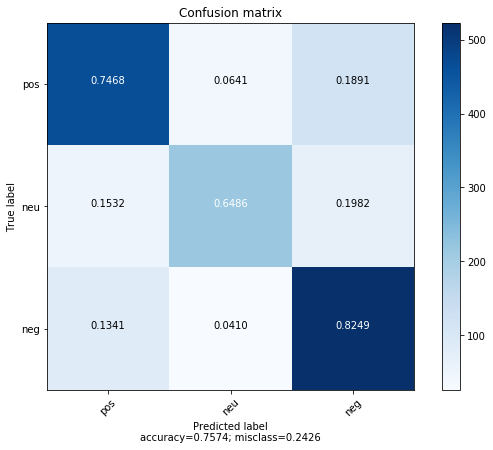

In [7]:
learn_obj2=svm.SVC(C=0.07,kernel='linear') 
learn_obj2.fit(X_train_word2vec, y_train_word2vec)

pred=learn_obj2.predict(X_train_word2vec)
print('Train:')
report=classification_report(y_train_word2vec,pred)
print(report)
print('accuracy: '+str(accuracy_score(y_train_word2vec,pred)))
conf_M=confusion_matrix(y_train_word2vec,pred,labels=['pos','neu','neg'])
#print(conf_M)
plot_confusion_mat(conf_M,target_names=['pos','neu','neg'])
#print(conf_M/ conf_M.astype(np.float64).sum() )



pred=learn_obj2.predict(X_test_word2vec)
print('\nTest:')
report=classification_report(y_test_word2vec,pred)
print(report)
print('accuracy: '+str(accuracy_score(y_test_word2vec,pred)))
conf_M=confusion_matrix(y_test_word2vec,pred,labels=['pos','neu','neg'])
#print(conf_M)
plot_confusion_mat(conf_M,target_names=['pos','neu','neg'])

#print(conf_M/ conf_M.astype(np.float64).sum() )

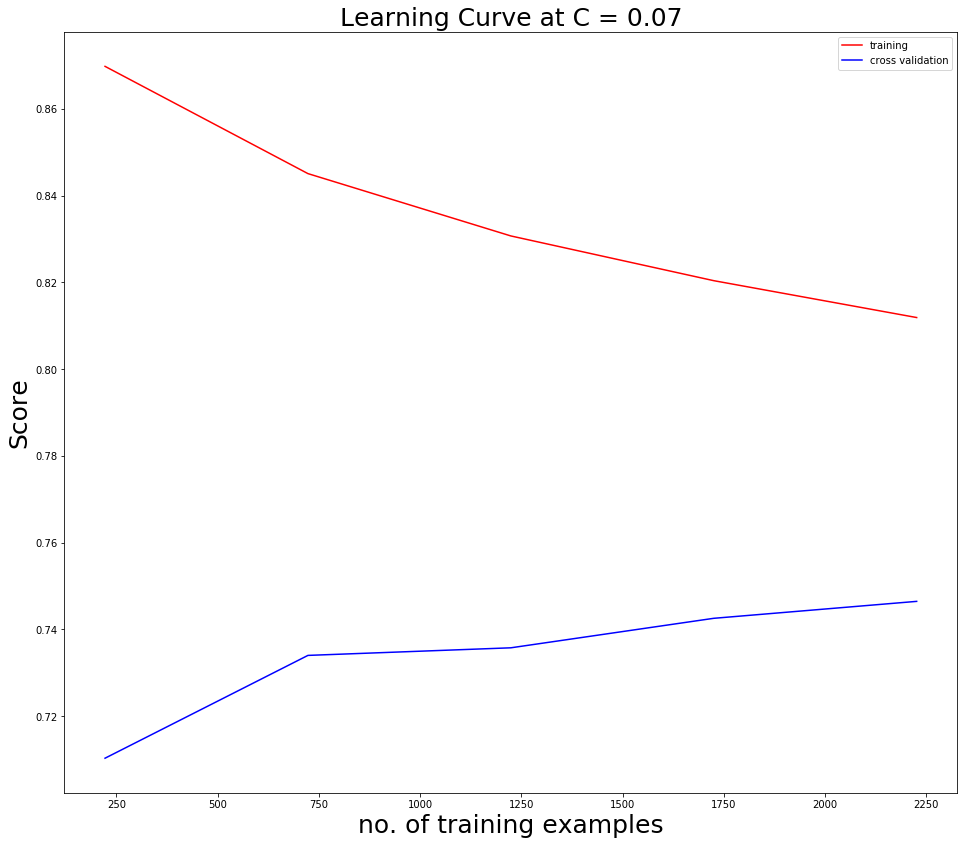

In [9]:
from sklearn.model_selection import learning_curve

plt.show()
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)

x_axis,y_train,y_cv=learning_curve(learn_obj2,X_train_word2vec,y_train_word2vec,cv=cv,n_jobs=3)

y_train_mean=np.mean(y_train,axis=1)
y_cv_mean=np.mean(y_cv,axis=1)


fig, ax = plt.subplots(1, figsize=(16, 14))
ax.set_title('Learning Curve at C = 0.07', fontdict={'fontsize': '25', 'fontweight' : '3'})

ax.plot(x_axis,y_train_mean,'r',label='training')
ax.plot(x_axis,y_cv_mean,'b',label='cross validation')

ax.set_ylabel('Score',fontdict={'fontsize': '25', 'fontweight' : '1'})
ax.set_xlabel('no. of training examples',fontdict={'fontsize': '25', 'fontweight' : '1'})

ax.legend()


plt.show()
fig.savefig('learning_curve.png')

In [21]:
pickle.dump(learn_obj,open('learnWV8_1.sav','wb'))